In [46]:
from IPython.display import FileLink

# Optimization of spermine production

## 1. Introduction

### 1.1 Literature review of the compound (spermine)

#### Applications of the product

Spermine is a natural polyamine found in all eucaryotes, and certain bacteria and viruses. In procaryotes, this polyamine is an essential growth factor for bacteria [1] and a stabilizer of the helical structure of DNA when it’s associated with nucleic acids of viruses [2]. In Eucaryotes, spermine is present in several different cellular processes in different types of tissues, such as the phosphorylation of proteins [3].

Today, spermine has many uses like cosmetic ingredients for moisturizing products (to close pores or reduce wrinkles) [4], and raw material for synthesizing derivatives of medical interest.

Recently, Spermine has demonstrated strong clinical relevance in various human cancers and benign diseases [5], and has the potential to become a promising therapeutic agent to treat ocular diseases such as *glaucoma*, *optic nerve injury*, and *cataracts* [6]. Besides, its acetylated effects on tubulins might be used to develop treatments for prion diseases. Recent studies show that increasing the acetylation of tubulins may facilitate autophagic degradation of prion aggregate [7].



#### Evaluation of market potential

Transmissible spongiform encephalopathies (TSEs or prion diseases) are a rare group of invariably fatal neurodegenerative disorders that affect humans and other mammals. TSEs are protein misfolding diseases by the accumulation of an abnormally aggregated form of the normal host prion protein (PrP) [8].  

The prion disease treatment market is expected to witness market growth at a rate of 4.90% in the forecast period of 2021 to 2028 [9]. According to a report published by Health America, in the United States, in 2019, independent research institutes, universities, and independent hospitals allocated more than US$ 12.5 billion of institutional funds for R&D of medical, healthcare, and diagnosis, while total U.S. medical & health R&D spending was US$ 171.8 billion [10].  

Thereby, spermine and its pathways could be profitably applied as a novel approach towards the clearance of misfolded prion proteins, an important application for the broader family of protein misfolding diseases.  

 

#### Biosynthetic pathway/genes

Three Spermine pathways were found in KEGG [11][12] Pathway database specifically inside the Arginine and Proline metabolism (Figure 1 [13]), the b-Alanine metabolism, and the Pantothenate and CoA biosynthesis. 

Spermidine can be biosynthesized from amino acids such as Arginine, Glutamate, Ornithine, Methionine, and Cysteine, which are common metabolites in cells. We are expecting our algorithm to modify parts of these metabolic pathways in order to increase Spermine synthesis.

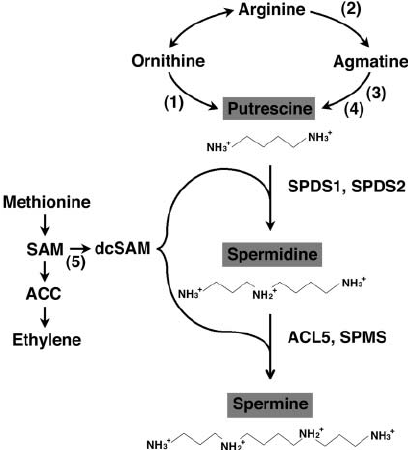

In [47]:
from IPython import display
display.Image("Images/Pathway.png")

*Figure 1: Pathway of biosynthesis of the major polyamines (putrescine, spermidine, and spermine) in plants. Enzymes numbers correspond to (1) ODC (EC 4.1.1.17), (2) ADC (EC 4.1.1.19), (3) agmatine iminohydrolase (EC 3.5.3.12), (4) N -carbamoylputrescine amidohydrolase (EC 3.5.1.53), and (5) SAMDC (EC 4.1.1.50). Spermidine is synthesized from putrescine by spermidine synthase (EC 2.5.1.16). Spermidine is further metabolized to spermine-by-spermine synthase (EC 2.5.1.22). The enzymes in Arabidopsis, SPDS1, SPDS2, ACL5, and SPMS, are indicated. ACC, 1-aminocyclopropane-1-carboxylic acid; dcSAM, decarboxylated S -adenosylmethionine [13].*

### 1.2 Literature review of E. coli str. K-12 substr. MG1655

*E. coli* is the most used Prokaryote and the best-characterized cell factory in terms of genome annotation, functional characterization, and knowledge of growth behavior. Its metabolic network has been reconstructed and refined for 33 years to date, making it an ideal target for metabolic reconstruction [14]. In addition, *E. coli* can be genetically engineered and offer a high growth rate, simple media requirement, handling easiness, high yield, and cost-effectiveness. Therefore, it is commonly used in industry to produce recombinant proteins [15], succinate [16], lactate, malate [17], amino acids [18], and other valued compounds.  The chosen strain, *E. coli str. K-12* is non-pathogenic [19] and safer than other pathogenic *E. coli* strains [20]. 

However, the use of *E. coli* cell factories can result in a loss of DNA and selection markers, spontaneous induction of gene expression, incorrect protein refolding, absence of post-translational modifications, intracellular accumulation of heterologous proteins (i.e., inclusion bodies), endotoxin contamination, proteolytic digestion, and difficulties in the downstream process. Despite *E. coli str. K-12* lacking pathogenicity genes, it produces endotoxins and therefore is not suitable for human consumption. However, FDA approves the use of substances derived from *E. coli str. K-12* [21].

*E. coli str. K-12 substr. MG1655* seems to be the best GSM available to optimize the production of spermine. Other models were also interesting:
- *Klebsiella pneumoniae subsp. pneumoniae MGH 78578* is also present in table 1 and has a relatively high memote total score (78%). However, it is a multidrug-resistance bacteria that cause several infections in humans [22]. Despite its higher growth rate, this model lacks fundamental features such as high yield and titer, easy to culture, and sustainable substrates [23]. 
- *Saccharomyces cerevisiae* is a culturable, well-characterized, and genetically engineerable eukaryotic-cell factory [24]. In comparison to *E. coli*, *S. cerevisiae* might achieve better folding and post-translational modifications [25]. However, GSM in *E. coli* described better results for spermine production and therefore we discarded the use of *S. cerevisiae* for this project.



## 2. Problem definition

This report aims to highlight and examine the strategies to optimize the production of spermine.

Many factors were considered in order to define and quantify the optimization of this specific pathway. Among them, yield, growth rate, and concentration played the most important role during our research. Taking into account the low yield that this metabolic pathway has, without being subjected to any modifications, as well as the high demand and profit that spermine could offer, the first goal would be to increase it. Ideally, a higher yield could also be combined with an optimized growth rate. The combination of these two factors is the key point that could also play an important role during the in vivo experiments that could follow this project.  

An optimized cell factory that could produce a considerable amount of spermine would nowadays offer a valuable, profitable solution since the demand for prion disease treatment is increasing.  




## 3. Selection and assessment of existing GSM

To choose amongst all the BiGG [26][27] models that possessed spmd_c (spermidine, the precursor of spermine) as a metabolite we first added the reaction that transforms spermidine in spermine (KEGG code: R02869, BiGG id: *sprms*) along its metabolites (if needed) then we designed an optimization strategy with a weighted quadratic objective: 

In [48]:
display.Image("Images/Quadra_obj1.png")

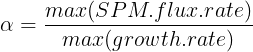

In [49]:
display.Image("Images/Quadra_obj2.png")

Once the ranking was done and exported to a CSV file (cf. GSM_choice.csv), we see that the eight first models have a significantly higher spermine flux which is at least two times higher than the others. So, we put them through memote [28][29] test and choose the best memote total score (Table 1). The choice of iAF1260b over iAF1260 is due to the modification added to the first one to make it more reliable than the second [30]. 

According to BiGG, this model corresponds to the organism: *Escherichia coli str. K-12 substr. MG1655*.




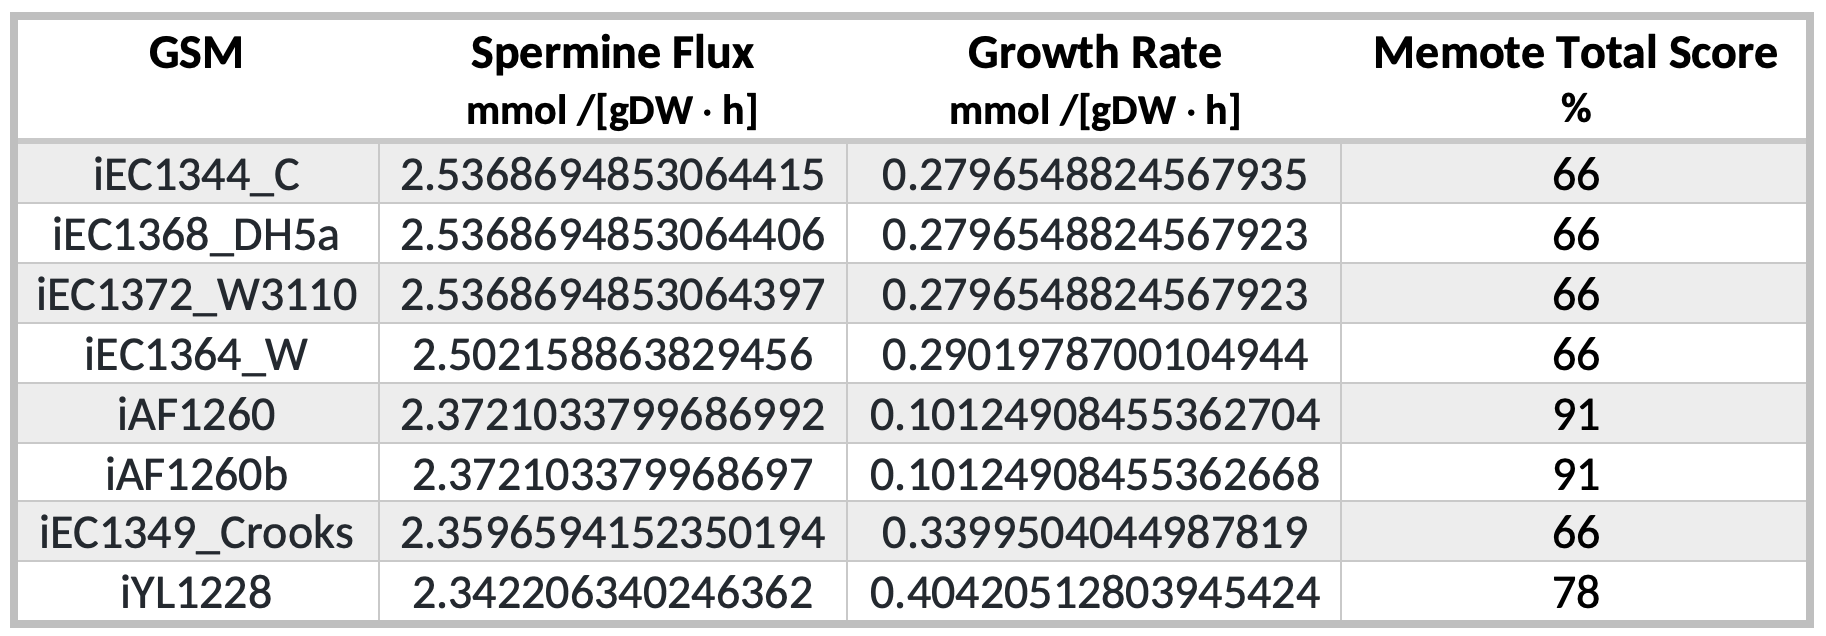

In [50]:
display.Image("Images/Table1.png")

*Table 1: Ranking of BiGG models in function of their spermine flux and growth rate (quadratic objective).*

In [51]:
FileLink('GSM_assessment.py')

/Users/rlm/Desktop/Master Biotech/Fall 22/27410 Computer-aided cell factory design/Group project/27410-group-assigment-16/GSM_assessment.py

## 4. Computer-Aided Cell Factory Engineering

As the spermidine synthase reaction (SPMS) was already part of the model, we needed to add the spermine synthase reaction (SPRMS) and a demand reaction for spermine (DM_sprm) to ensure the pseudo-steady state. Testing for several different carbon sources and their dependence on O2 uptake, we saw that the optimum objective value is achieved in Aerobic conditions with D-Glucose in the medium.

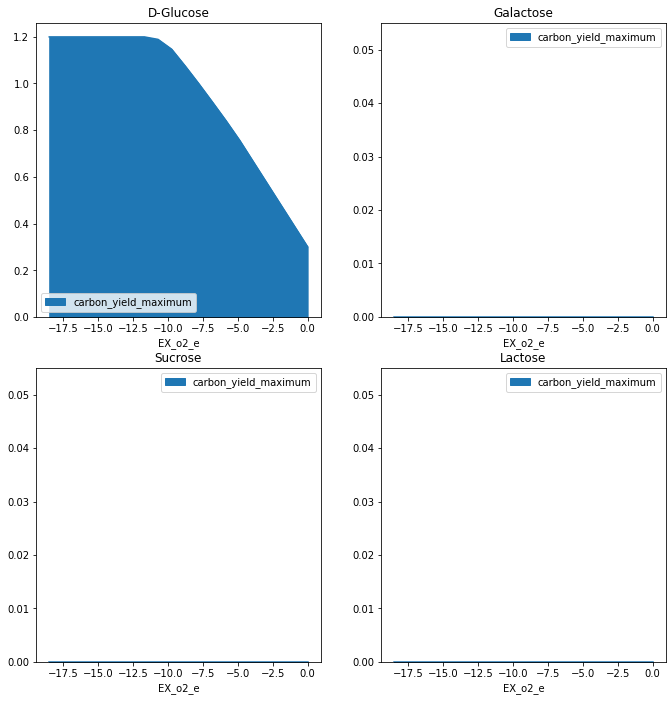

In [52]:
from Phenotipic_phase_planing import plot, get_summary
plot()

The maximum flux for SPRMS in an optimal strain with our quadratic objective is 2.372103379968694 mmol /[gDW h], corresponding to a yield of 0.296512922496087 mmol Spermine/mmol of D-Glucose. Needed medium composition:

In [53]:
get_summary()

Objective
3.721274837644101 BIOMASS_Ec_iAF1260_core_59p81M + 1.0 SPRMS = 2.7488790506526084

Uptake
------
Metabolite      Reaction      Flux  C-Number   C-Flux
     ca2_e      EX_ca2_e 0.0004796         0    0.00%
      cl_e       EX_cl_e 0.0004796         0    0.00%
 cobalt2_e  EX_cobalt2_e 0.0003197         0    0.00%
     cu2_e      EX_cu2_e 0.0003197         0    0.00%
     fe2_e      EX_fe2_e  0.001484         0    0.00%
  glc__D_e   EX_glc__D_e         8         6  100.00%
       k_e        EX_k_e   0.01798         0    0.00%
     mg2_e      EX_mg2_e 0.0007994         0    0.00%
     mn2_e      EX_mn2_e 0.0003197         0    0.00%
    mobd_e     EX_mobd_e 0.0003197         0    0.00%
     nh4_e      EX_nh4_e     10.58         0    0.00%
      o2_e       EX_o2_e     11.62         0    0.00%
      pi_e       EX_pi_e   0.09733         0    0.00%
     so4_e      EX_so4_e   0.02534         0    0.00%
     zn2_e      EX_zn2_e 0.0003197         0    0.00%

Secretion
---------
Metaboli

In [54]:
FileLink('FVA_script.py')

/Users/rlm/Desktop/Master Biotech/Fall 22/27410 Computer-aided cell factory design/Group project/27410-group-assigment-16/FVA_script.py

To determine which reaction(s) needed to be modified in order to increase spermine production we first did a Flux Variability Analysis on all reactions in the Wild-Type model and Optimized strain to determine reaction bounds in both models using the glpk solver. Then we apply the first steps of the OptForce algorithm [31] by storing reactions in MUST sets. For every reaction flux that had different bounds in the Wild Type (WT) and the Optimal Strain (OS) we filtered them to the appropriate MUST set:

- If flux boundaries of WT are superior to OS’s, the reaction needs to be down-regulated and stored in MUST_L.
- If flux boundaries of WT are inferior to OS’s, the reaction needs to be down-regulated and stored in MUST_U.
- If flux boundaries are both equal to 0 is OS, the reaction needs to be Knocked-out and is stored in MUST_X. 

*If ranges in WT and OS overlap, the reaction might not need to be modified in order to optimize SPRMS flux.* 

Once these MUST sets are established, they are merged into one set of Reaction to Analyze (*RA* in the code). For every reaction in *RA*, a temporary copy of the global model with max(growth rate) as its objective is created. In this temporary model, the reaction boundaries are set to their values in the Optimal Strain and then the value of SPRMS flux is computed through FBA. When all *RA* reactions have been tested, the reaction (and the ones in a 3% range) that increases the SPRMS flux the most has its boundaries set to OS’s values in the global model and is removed from *RA*. Then the program keeps looping through *RA* and adding new permanent modifications to the model as long as it keeps increasing the SPRMS flux. When the loop stops the result are written in the output file “*Optimization strategy.txt*” within different ranks symbolizing how important are the associated reactions to the SPRMS flux.

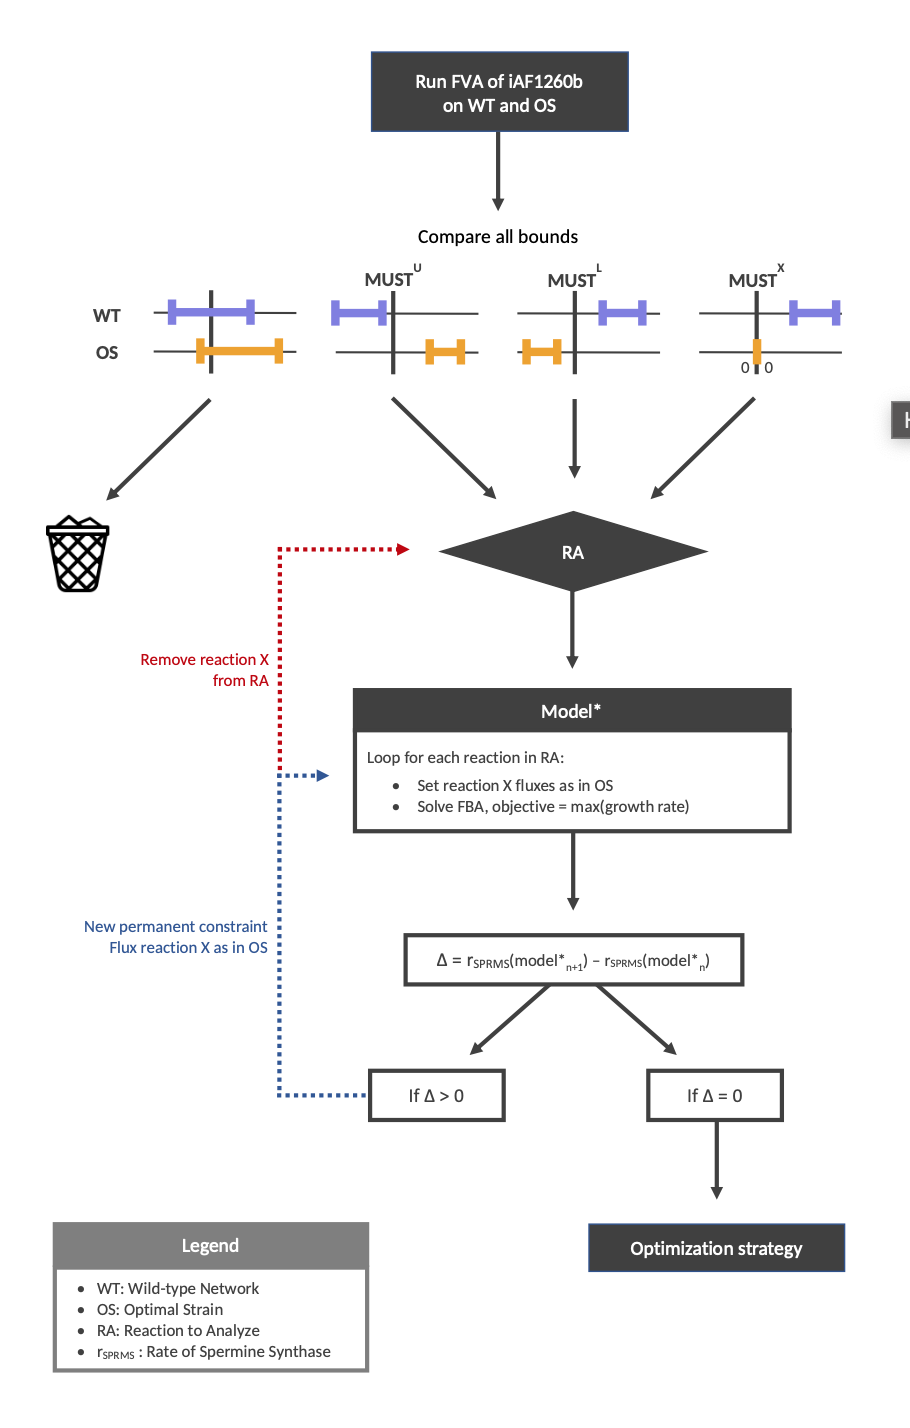

In [55]:
display.Image("Images/FVA.png")

*Figure 2: Overview of the algorithm used to obtain our optimization strategy.*

In [56]:
FileLink('Optimization.py')

/Users/rlm/Desktop/Master Biotech/Fall 22/27410 Computer-aided cell factory design/Group project/27410-group-assigment-16/Optimization.py

Regarding the Optimization strategies found, some rank 1 modifications seem obvious as the Up- regulation of SPMS and/or SPRMS reaction. Whereas some other modifications couldn’t have been predicted as essential to the SPRMS flux increase such as the up-regulation of UNK3 (2-keto-4- methylthiobutyrate transamination) or MTAN (Methylthioadenosine nucleosidase). In the list of rank 1 reactions, we can see that only Up-regulations are needed. There are several different ways to up-regulate an enzyme/reaction, some examples would be:
- Co-factor swap: DKMPPD3 reaction perform NAD+ → NADH, we could check if switching to NADP+ → NADPH enhances the flux of this reaction. 
- Enzyme modification/analog: The xylose isomerase enzyme (rank 2 reaction XYLI2) contains Mg2+ ions [32], switching to different element ions could increase the enzyme efficiency. 
- Substrate elimination: Adenosylhomocysteine nucleosidase (reaction MTAN) acts on three different substrates [33], we could eliminate the substrate not linked to the target metabolic pathway.


## 5. Discussion

As we knew that models are only relevant for calculations and do not necessarily represent *in vivo* reality, we set a balanced objective between maximizing Growth rate and SPRMS flux to ensure that the *E.coli* bacteria to whom we apply our strategy could grow. But even with this precaution, it is still possible that some aspects such as the toxicity of certain compounds or the disturbance of metabolic pathways that aren’t part of the computational model iAF1260b would render our solutions infeasible *in vivo*. 

Also as SPRMS reaction and SPM (spermine) metabolite were not present in the model reactions neither are pathways involving spermine as a substrate such as *β-Alanine metabolism* or *Glutathione metabolism* [34]. The reactions in these pathways could be the targets for down-regulation or Knock-out. Also rank 2 modifications in our Optimization strategy don’t increase a lot SPRMS flux for the moment but with the addition of these pathways, they could become essential. 

The next step would be to try to up-regulate one of the rank 1 reactions with one of the methods listed. As all Spermine production rates resulting from the up-regulation of these reactions are in the same 3% range, the choice amongst them can be based on the availability and feasibility of solutions to up-regulate the reaction in question.

## 6. Conclusion

With the recent apparition of Prion diseases, the need for treatment keeps on growing and Spermine producing Cell-factory could be a powerful therapeutic tool. The aim of this project was to lay down the basis for the design of a competent Cell-factory in this regard. The first difficulty we faced was the absence of the spermine metabolites (BiGG id: *spm*) in most GSM (1 hit on BiGG). After adding the Spermine synthase reaction as a heterologous pathway, we computationally went through the BiGG model to find the one which fitted best our expectations of growth and Spermine production. Then we tried to implement the OptForce algorithm but we could only add the first steps. From OptForce, our algorithm inherited the MUST sets that gave us a good overview of what modifications were needed to obtain the Optimal strain. The summary of how we found the essential ones can be seen in Figure 2. Most of the worries regarding the feasibility of our solution(s) *in vivo* are caused by the models being incomplete regarding Spermine pathways. Adding pathways including Spermine as a metabolite to the models could help get a clearer view of how feasible is a Spermine producing Cell-factory. Now we have no doubts that with time and models becoming closer to *in vivo* organisms, our strategy will be assessed or not as feasible.

## References

[1]	B. M. Guirard and E. E. Snell, ‘EFFECT OF POLYAMINE STRUCTURE ON GROWTH STIMULATION AND SPERMINE AND SPERMIDINE CONTENT OF LACTIC ACID BACTERIA’, J Bacteriol, vol. 88, no. 1, pp. 72–80, Jul. 1964, doi: 10.1128/jb.88.1.72-80.1964.

[2]	H. Tabor, ‘The Protective Effect of Spermine and Other Polyamines Against Heat Denaturation of Deoxyribonucleic Acid’, Biochemistry, vol. 1, no. 3, pp. 496–501, May 1962, doi: 10.1021/bi00909a021.

[3]	K. Igarashi and K. Kashiwagi, ‘The functional role of polyamines in eukaryotic cells’, Int J Biochem Cell Biol, vol. 107, pp. 104–115, Feb. 2019, doi: 10.1016/j.biocel.2018.12.012.

[4]	Fabio Rinaldi, Elisabetta Sorbellini, Sergio Baroni, and Anna Benedusi, ‘Use of Spermine and/or Spermidine against skin ageting in dietary, pharmaceutical or cosmetic compositions’, Jul. 2004.

[5]	R. T.-H. Tse, C. Y.-P. Wong, P. K.-F. Chiu, and C.-F. Ng, ‘The Potential Role of Spermine and Its Acetylated Derivative in Human Malignancies’, Int J Mol Sci, vol. 23, no. 3, p. 1258, Jan. 2022, doi: 10.3390/ijms23031258.

[6]	W. Han, H. Li, and B. Chen, ‘Research Progress and Potential Applications of Spermidine in Ocular Diseases’, Pharmaceutics, vol. 14, no. 7, p. 1500, Jul. 2022, doi: 10.3390/pharmaceutics14071500.

[7]	K. Phadwal, D. Kurian, M. K. F. Salamat, V. E. MacRae, A. B. Diack, and J. C. Manson, ‘Spermine increases acetylation of tubulins and facilitates autophagic degradation of prion aggregates’, Sci Rep, vol. 8, no. 1, p. 10004, Dec. 2018, doi: 10.1038/s41598-018-28296-y.

[8]	R. A. Moore, L. M. Taubner, and S. A. Priola, ‘Prion protein misfolding and disease’, Curr Opin Struct Biol, vol. 19, no. 1, pp. 14–22, Feb. 2009, doi: 10.1016/j.sbi.2008.12.007.

[9]	‘Global Prion Disease Treatment Market – Industry Trends and Forecast to 2028’, Jul. 2021. Accessed: Nov. 20, 2022. [Online]. Available: https://www.databridgemarketresearch.com/reports/global-prion-disease-treatment-market#https://www.databridgemarketresearch.com/reports/global-prion-disease-treatment-market#

[10]	‘Human Prion Disease Diagnostics Market’. Accessed: Nov. 20, 2022. [Online]. Available: https://www.factmr.com/report/human-prion-disease-diagnostics-market

[11]	‘KEGG’. https://www.kegg.jp/kegg/ (accessed Nov. 23, 2022).

[12]	M. Kanehisa, M. Furumichi, M. Tanabe, Y. Sato, and K. Morishima, ‘KEGG: new perspectives on genomes, pathways, diseases and drugs’, Nucleic Acids Res, vol. 45, no. D1, pp. D353–D361, Jan. 2017, doi: 10.1093/nar/gkw1092.

[13]	A. Imai et al., ‘Spermidine Synthase Genes Are Essential for Survival of Arabidopsis’, Plant Physiol, vol. 135, no. 3, pp. 1565–1573, Jul. 2004, doi: 10.1104/pp.104.041699.

[14]	A. M. Feist et al., ‘A genome‐scale metabolic reconstruction for Escherichia coli K‐12 MG1655 that accounts for 1260 ORFs and thermodynamic information’, Mol Syst Biol, vol. 3, no. 1, p. 121, Jan. 2007, doi: 10.1038/msb4100155.

[15]	N. A. Baeshen et al., ‘Cell factories for insulin production’, Microb Cell Fact, vol. 13, no. 1, p. 141, Dec. 2014, doi: 10.1186/s12934-014-0141-0.

[16]	C. Thakker, I. Martínez, K.-Y. San, and G. N. Bennett, ‘Succinate production in Escherichia coli’, Biotechnol J, vol. 7, no. 2, pp. 213–224, Feb. 2012, doi: 10.1002/biot.201100061.

[17]	X. Zhang, X. Wang, K. T. Shanmugam, and L. O. Ingram, ‘<scp>l</scp> -Malate Production by Metabolically Engineered Escherichia coli’, Appl Environ Microbiol, vol. 77, no. 2, pp. 427–434, Jan. 2011, doi: 10.1128/AEM.01971-10.

[18]	A. Rodriguez, J. A. Martnez, N. Flores, A. Escalante, G. Gosset, and F. Bolivar, ‘Engineering Escherichia coli to overproduce aromatic amino acids and derived compounds’, Microb Cell Fact, vol. 13, no. 1, p. 126, Dec. 2014, doi: 10.1186/s12934-014-0126-z.

[19]	P. Koli, S. Sudan, D. Fitzgerald, S. Adhya, and S. Kar, ‘Conversion of Commensal Escherichia coli K-12 to an Invasive Form via Expression of a Mutant Histone-Like Protein’, mBio, vol. 2, no. 5, Nov. 2011, doi: 10.1128/mBio.00182-11.

[20]	J. B. Kaper, J. P. Nataro, and H. L. T. Mobley, ‘Pathogenic Escherichia coli’, Nat Rev Microbiol, vol. 2, no. 2, pp. 123–140, Feb. 2004, doi: 10.1038/nrmicro818.

[21]	FDA (US Food and Drug Administration), ‘Microorganisms & Microbial-Derived Ingredients Used in Food (Partial List)’, Apr. 01, 2018.

[22]	C. J. Norsigian et al., ‘Comparative Genome-Scale Metabolic Modeling of Metallo-Beta-Lactamase–Producing Multidrug-Resistant Klebsiella pneumoniae Clinical Isolates’, Front Cell Infect Microbiol, vol. 9, May 2019, doi: 10.3389/fcimb.2019.00161.

[23]	K. K. Kumarasamy et al., ‘Emergence of a new antibiotic resistance mechanism in India, Pakistan, and the UK: a molecular, biological, and epidemiological study’, Lancet Infect Dis, vol. 10, no. 9, pp. 597–602, Sep. 2010, doi: 10.1016/S1473-3099(10)70143-2.

[24]	D. G. Fisk et al., ‘Saccharomyces cerevisiae S288C genome annotation: a working hypothesis’, Yeast, vol. 23, no. 12, pp. 857–865, Sep. 2006, doi: 10.1002/yea.1400.

[25]	N. A. Baeshen et al., ‘Cell factories for insulin production’, Microb Cell Fact, vol. 13, no. 1, p. 141, Dec. 2014, doi: 10.1186/s12934-014-0141-0.

[26]	‘BiGG Models’. http://bigg.ucsd.edu (accessed Nov. 23, 2022).

[27]	Z. A. King et al., ‘BiGG Models: A platform for integrating, standardizing and sharing genome-scale models’, Nucleic Acids Res, vol. 44, no. D1, pp. D515–D522, Jan. 2016, doi: 10.1093/nar/gkv1049.

[28]	‘Memote ’. https://memote.io (accessed Nov. 23, 2022).

[29]	C. Lieven et al., ‘MEMOTE for standardized genome-scale metabolic model testing’, Nat Biotechnol, vol. 38, no. 3, pp. 272–276, Mar. 2020, doi: 10.1038/s41587-020-0446-y.

[30]	J. D. Orth et al., ‘A comprehensive genome‐scale reconstruction of Escherichia coli metabolism—2011’, Mol Syst Biol, vol. 7, no. 1, p. 535, Jan. 2011, doi: 10.1038/msb.2011.65.

[31]	S. Ranganathan, P. F. Suthers, and C. D. Maranas, ‘OptForce: An Optimization Procedure for Identifying All Genetic Manipulations Leading to Targeted Overproductions’, PLoS Comput Biol, vol. 6, no. 4, p. e1000744, Apr. 2010, doi: 10.1371/journal.pcbi.1000744.

[32]	‘ Xylose isomerase ’, KEGG. https://www.kegg.jp/entry/5.3.1.5 (accessed Nov. 23, 2022).

[33]	‘Adenosylhomocysteine nucleosidase’, KEGG. https://www.kegg.jp/entry/3.2.2.9 (accessed Nov. 23, 2022).

[34]	‘Arginine and proline metabolism’, KEGG. https://www.kegg.jp/pathway/map00330 (accessed Nov. 23, 2022). 